In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler
from sklearn import metrics
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score

sns.set_theme(style="darkgrid")

In [2]:
file = ("PaysimData.csv")
finData = pd.read_csv(file)
finData

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,1,PAYMENT,9839.64,C1231006815,170136.00,160296.36,M1979787155,0.00,0.00,0,0
1,1,PAYMENT,1864.28,C1666544295,21249.00,19384.72,M2044282225,0.00,0.00,0,0
2,1,TRANSFER,181.00,C1305486145,181.00,0.00,C553264065,0.00,0.00,1,0
3,1,CASH_OUT,181.00,C840083671,181.00,0.00,C38997010,21182.00,0.00,1,0
4,1,PAYMENT,11668.14,C2048537720,41554.00,29885.86,M1230701703,0.00,0.00,0,0
...,...,...,...,...,...,...,...,...,...,...,...
6362615,743,CASH_OUT,339682.13,C786484425,339682.13,0.00,C776919290,0.00,339682.13,1,0
6362616,743,TRANSFER,6311409.28,C1529008245,6311409.28,0.00,C1881841831,0.00,0.00,1,0
6362617,743,CASH_OUT,6311409.28,C1162922333,6311409.28,0.00,C1365125890,68488.84,6379898.11,1,0
6362618,743,TRANSFER,850002.52,C1685995037,850002.52,0.00,C2080388513,0.00,0.00,1,0


In [3]:
finData.head()

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,1,PAYMENT,9839.64,C1231006815,170136.0,160296.36,M1979787155,0.0,0.0,0,0
1,1,PAYMENT,1864.28,C1666544295,21249.0,19384.72,M2044282225,0.0,0.0,0,0
2,1,TRANSFER,181.00,C1305486145,181.0,0.00,C553264065,0.0,0.0,1,0
3,1,CASH_OUT,181.00,C840083671,181.0,0.00,C38997010,21182.0,0.0,1,0
4,1,PAYMENT,11668.14,C2048537720,41554.0,29885.86,M1230701703,0.0,0.0,0,0


In [4]:
finData.shape

(6362620, 11)

In [5]:
finData.isnull().sum()

step              0
type              0
amount            0
nameOrig          0
oldbalanceOrg     0
newbalanceOrig    0
nameDest          0
oldbalanceDest    0
newbalanceDest    0
isFraud           0
isFlaggedFraud    0
dtype: int64

In [6]:
finData['nameDest'].nunique()

2722362

Remove name columns to ensure user confidentiality and expect little predictive power.

In [7]:
finData = finData.drop(labels = ['nameOrig', 'nameDest'], axis = 1)
finData.sample(10)

,step,type,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
14023,8,CASH_OUT,103556.89,119278.0,15721.11,1034120.48,1077837.29,0,0
5327164,374,PAYMENT,3432.23,0.0,0.00,0.00,0.00,0,0
4864944,348,CASH_OUT,181389.43,99822.0,0.00,2105885.75,2287275.18,0,0
4494049,325,TRANSFER,129196.92,0.0,0.00,353949.14,483146.06,0,0
3401622,255,CASH_OUT,169179.10,0.0,0.00,523467.07,692646.17,0,0
3352760,254,CASH_OUT,12382.29,0.0,0.00,907365.25,919747.54,0,0
1754211,161,CASH_OUT,130447.85,0.0,0.00,676027.61,934799.34,0,0
5246208,371,CASH_IN,14701.28,5464.0,20165.28,0.00,0.00,0,0
1293245,136,CASH_OUT,372020.72,139769.0,0.00,0.00,372020.72,0,0
5163091,358,CASH_IN,185701.64,8555.0,194256.64,0.00,0.00,0,0


Add two new columns for account discrepancies.  Set variables to calculated discrepancy between original account balances after transaction and destination account balances after transaction

In [8]:
finData['origBalanceDiscrepancy'] = finData.newbalanceOrig + finData.amount - finData.oldbalanceOrg

finData['destinationBalanceDiscrepancy'] = finData.oldbalanceDest + finData.amount - finData.newbalanceDest

In [9]:
finData.head()

,step,type,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud,origBalanceDiscrepancy,destinationBalanceDiscrepancy
0,1,PAYMENT,9839.64,170136.0,160296.36,0.0,0.0,0,0,0.0,9839.64
1,1,PAYMENT,1864.28,21249.0,19384.72,0.0,0.0,0,0,0.0,1864.28
2,1,TRANSFER,181.00,181.0,0.00,0.0,0.0,1,0,0.0,181.00
3,1,CASH_OUT,181.00,181.0,0.00,21182.0,0.0,1,0,0.0,21363.00
4,1,PAYMENT,11668.14,41554.0,29885.86,0.0,0.0,0,0,0.0,11668.14


In [10]:
print(finData.isFraud.sum())

8213


Illustrate fraudulent transactions by transaction type

<AxesSubplot:xlabel='type', ylabel='count'>

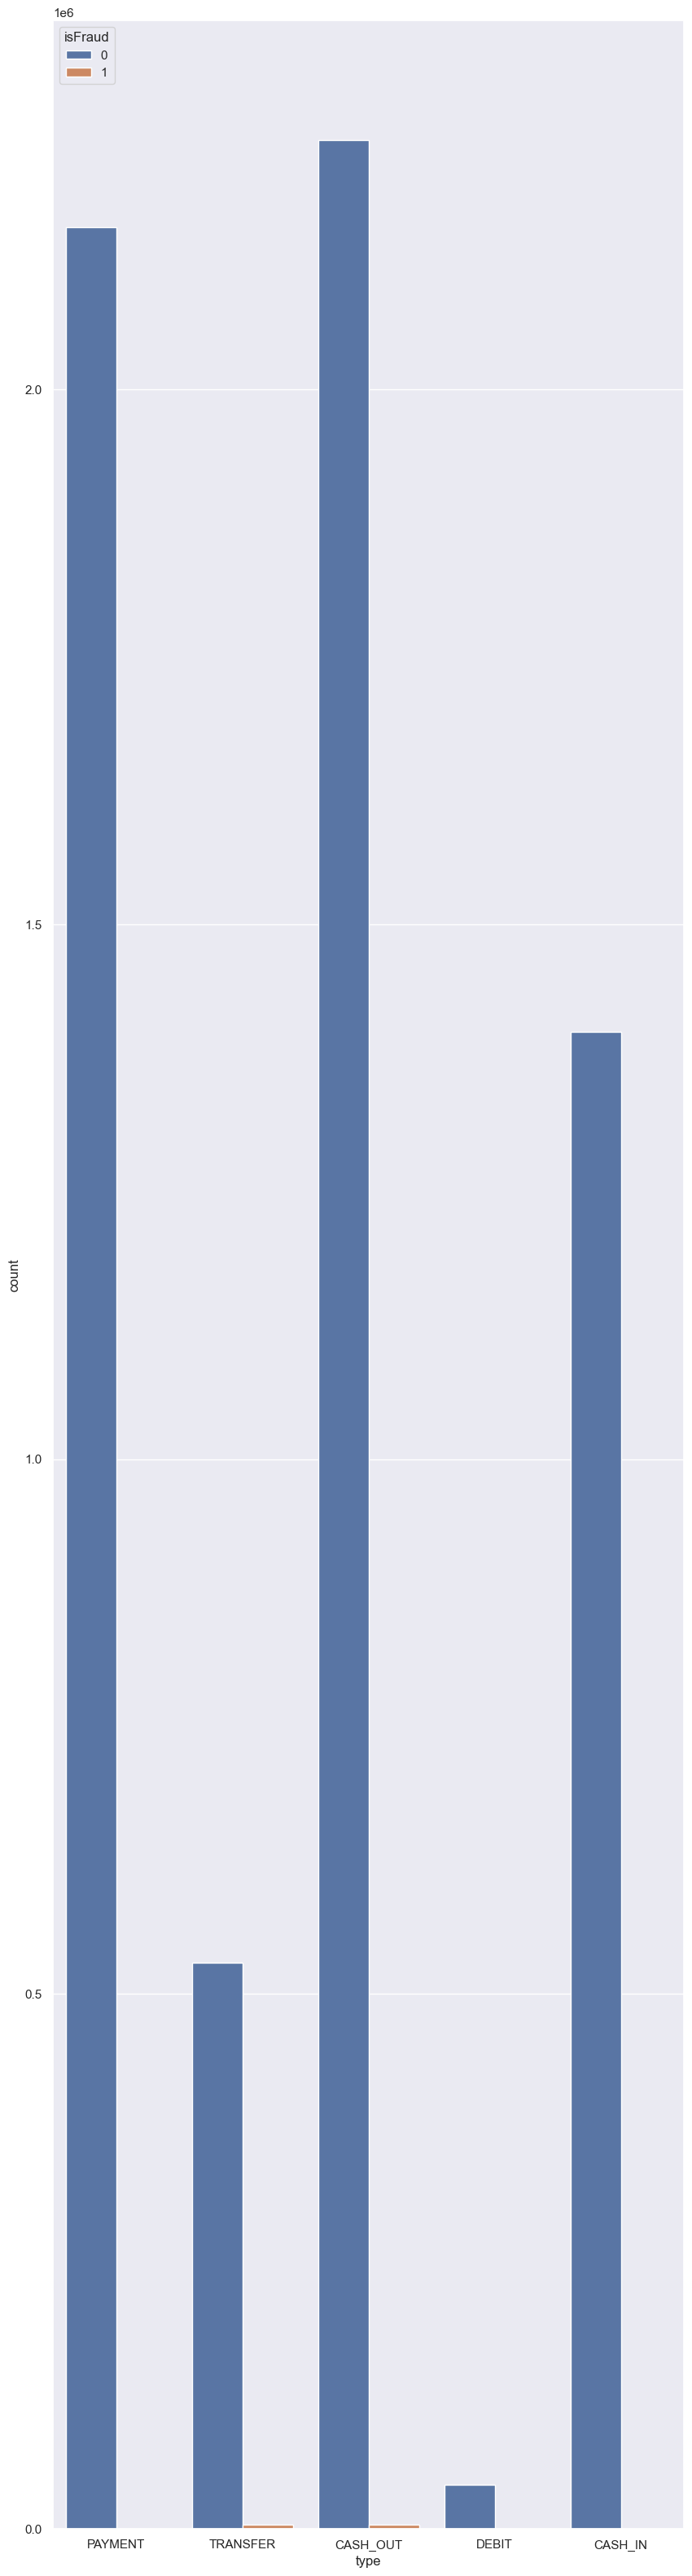

In [11]:
plt.figure(figsize = (10, 40))

sns.countplot(x = 'type', data = finData, hue = 'isFraud')

TRANSFER and CASH_OUT types identified as relevant data

In [12]:
relData = finData.loc[(finData.type == 'TRANSFER') | (finData.type == 'CASH_OUT')]

relData.shape

(2770409, 11)

Verify new dataset (relData) is inclusive of total fraudulent transactions

In [13]:
relData['isFraud'].value_counts()

0    2762196
1       8213
Name: isFraud, dtype: int64

In [14]:
relData.head()

,step,type,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud,origBalanceDiscrepancy,destinationBalanceDiscrepancy
2,1,TRANSFER,181.00,181.0,0.0,0.0,0.00,1,0,0.00,181.0
3,1,CASH_OUT,181.00,181.0,0.0,21182.0,0.00,1,0,0.00,21363.0
15,1,CASH_OUT,229133.94,15325.0,0.0,5083.0,51513.44,0,0,213808.94,182703.5
19,1,TRANSFER,215310.30,705.0,0.0,22425.0,0.00,0,0,214605.30,237735.3
24,1,TRANSFER,311685.89,10835.0,0.0,6267.0,2719172.89,0,0,300850.89,-2401220.0


## Destination Account Discrepancy

Scatterplot visualization of fraudulent and non-fraudulent transactions over a 24-hour period, illustrating patterns in discrepancy in the destination account

<AxesSubplot:xlabel='step', ylabel='destinationBalanceDiscrepancy'>

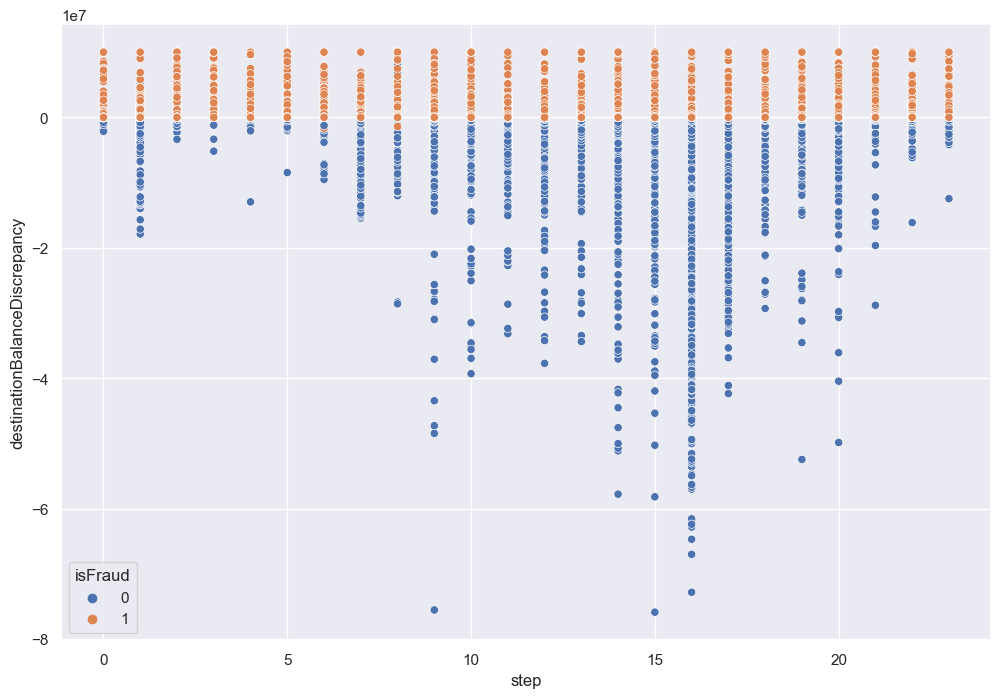

In [15]:
dailyStep = relData['step'] % 24
plt.figure(figsize = (12, 8))
sns.scatterplot(data=relData, x=dailyStep, y=relData['destinationBalanceDiscrepancy'], hue='isFraud', palette='deep')

Set variables for transfers and cashout transaction types

In [16]:
transfers = relData.loc[(relData.type == 'TRANSFER')]
cashout = relData.loc[(relData.type == 'CASH_OUT')]

transfers.shape

(532909, 11)

In [17]:
transfers.head()

,step,type,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud,origBalanceDiscrepancy,destinationBalanceDiscrepancy
2,1,TRANSFER,181.00,181.00,0.0,0.00,0.00,1,0,0.00,181.00
19,1,TRANSFER,215310.30,705.00,0.0,22425.00,0.00,0,0,214605.30,237735.30
24,1,TRANSFER,311685.89,10835.00,0.0,6267.00,2719172.89,0,0,300850.89,-2401220.00
58,1,TRANSFER,62610.80,79114.00,16503.2,517.00,8383.29,0,0,0.00,54744.51
78,1,TRANSFER,42712.39,10363.39,0.0,57901.66,24044.18,0,0,32349.00,76569.87


<AxesSubplot:xlabel='Hour of Day', ylabel='Destination Balance Discrepancy'>

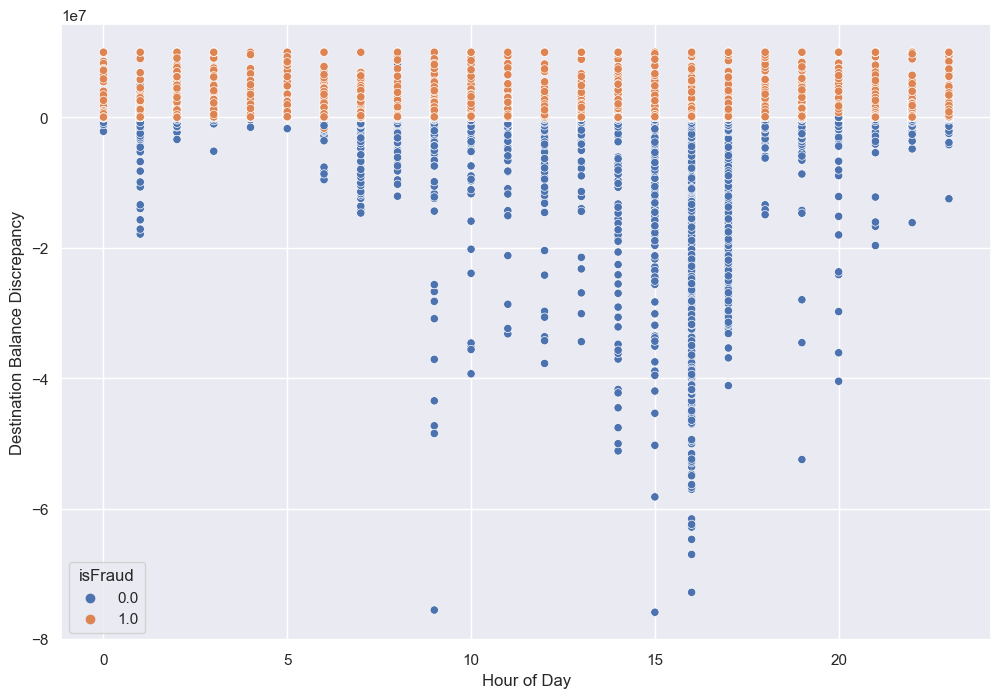

In [18]:
plt.figure(figsize = (12, 8))
sns.scatterplot(data=transfers, x=dailyStep.rename("Hour of Day"), 
    y=transfers['destinationBalanceDiscrepancy'].rename("Destination Balance Discrepancy"), hue='isFraud', palette='deep')

<AxesSubplot:xlabel='Hour of Day', ylabel='Destination Balance Discrepancy'>

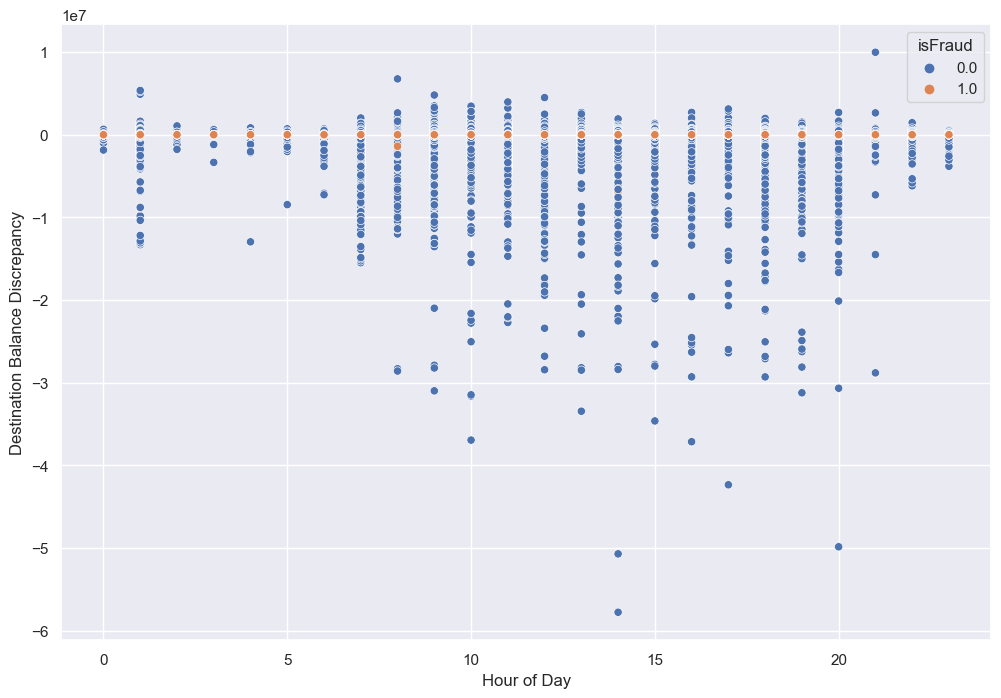

In [19]:
plt.figure(figsize = (12, 8))
sns.scatterplot(data=cashout, x=dailyStep.rename("Hour of Day"), 
    y=cashout['destinationBalanceDiscrepancy'].rename("Destination Balance Discrepancy"), hue='isFraud', palette='deep')

<AxesSubplot:xlabel='Hour of Day', ylabel='Original Balance Discrepancy'>

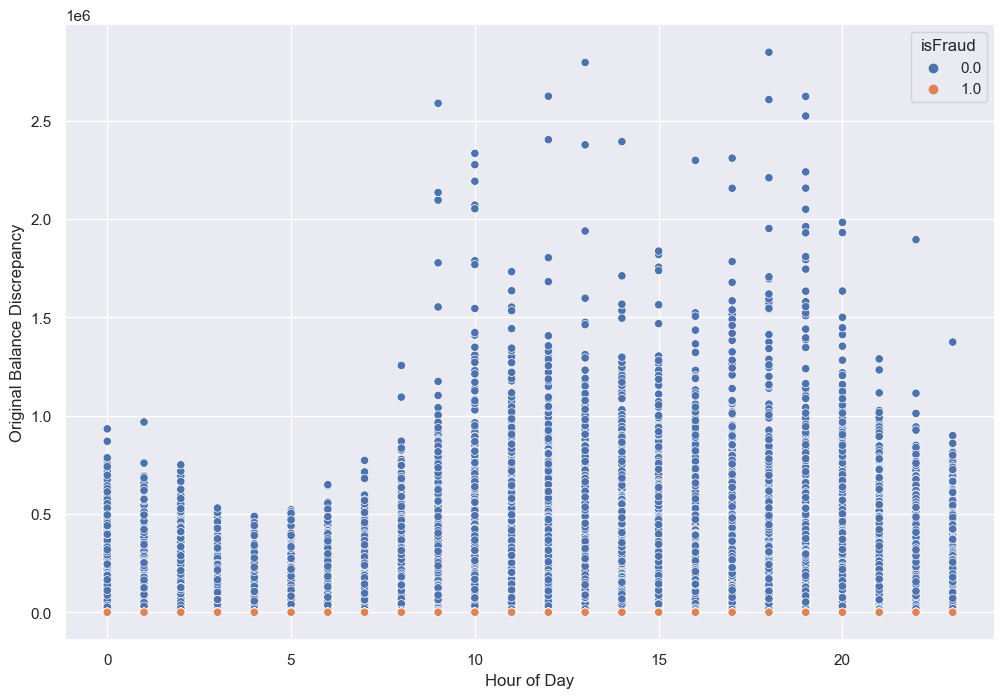

In [20]:
plt.figure(figsize = (12, 8))
sns.scatterplot(data=cashout, x=dailyStep.rename("Hour of Day"), 
    y=cashout['origBalanceDiscrepancy'].rename("Original Balance Discrepancy"), hue='isFraud', palette='deep')

## Analysis of Logistic Regression Model on relevant data

In [21]:
relData.head()

,step,type,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud,origBalanceDiscrepancy,destinationBalanceDiscrepancy
2,1,TRANSFER,181.00,181.0,0.0,0.0,0.00,1,0,0.00,181.0
3,1,CASH_OUT,181.00,181.0,0.0,21182.0,0.00,1,0,0.00,21363.0
15,1,CASH_OUT,229133.94,15325.0,0.0,5083.0,51513.44,0,0,213808.94,182703.5
19,1,TRANSFER,215310.30,705.0,0.0,22425.0,0.00,0,0,214605.30,237735.3
24,1,TRANSFER,311685.89,10835.0,0.0,6267.0,2719172.89,0,0,300850.89,-2401220.0


Feature variables

In [22]:
X = relData.drop(['isFraud', 'type'], axis = 1)
y = relData['isFraud']

Split dataset

In [23]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 100)

X_train.shape, X_test.shape

((1939286, 9), (831123, 9))

Standardize the feature variables

In [24]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [25]:
logistic_model = LogisticRegression()

logistic_model.fit(X_train, y_train)

LogisticRegression()

In [26]:
model_predictions = logistic_model.predict(X_test)

model_predictions[:5]

array([0, 0, 0, 0, 0])

Print model coefficients

In [27]:
print(logistic_model.coef_)

[[  0.75252384 -18.32640336   7.24317886  -4.93123147   1.50667909
   -2.62513767   0.98938692 -21.47599197   3.75973267]]


In [28]:
print('Logistic Regression (Standardized)\n')

print('Accuracy: ', accuracy_score(y_test, model_predictions))
print('Recall: ', recall_score(y_test, model_predictions))

Logistic Regression (Standardized)

Accuracy:  0.9983829108326926
Recall:  0.48581847649918963


Confusion Matrix illustrating true negatives, false negatives, true positives, and false positives

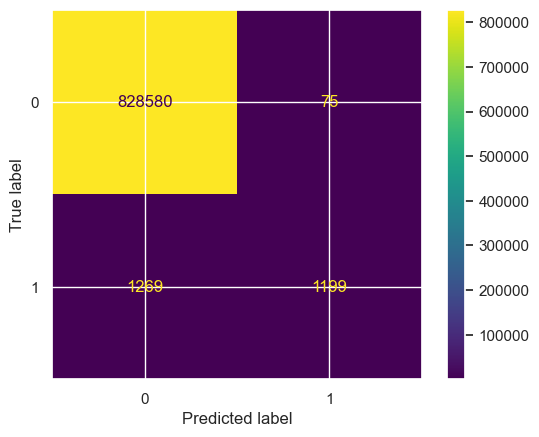

In [29]:
cm = metrics.confusion_matrix(y_test, model_predictions, labels=logistic_model.classes_)
display = metrics.ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=logistic_model.classes_)
display.plot();

## Transfers Only Model

In [30]:
transfers.head()

,step,type,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud,origBalanceDiscrepancy,destinationBalanceDiscrepancy
2,1,TRANSFER,181.00,181.00,0.0,0.00,0.00,1,0,0.00,181.00
19,1,TRANSFER,215310.30,705.00,0.0,22425.00,0.00,0,0,214605.30,237735.30
24,1,TRANSFER,311685.89,10835.00,0.0,6267.00,2719172.89,0,0,300850.89,-2401220.00
58,1,TRANSFER,62610.80,79114.00,16503.2,517.00,8383.29,0,0,0.00,54744.51
78,1,TRANSFER,42712.39,10363.39,0.0,57901.66,24044.18,0,0,32349.00,76569.87


Feature variables

In [31]:
XT = transfers.drop(['isFraud', 'type'], axis = 1)
yt = transfers['isFraud']

Split Transfers Dataset

In [32]:
XT_train, XT_test, yt_train, yt_test = train_test_split(XT, yt, test_size = 0.3, random_state = 0)

XT_train.shape, XT_test.shape

((373036, 9), (159873, 9))

Fit the model to the dataset

In [33]:
logisticTransfer = LogisticRegression()
logisticTransfer.fit(XT_train, yt_train)


LogisticRegression()

In [34]:
logtransfer_predictions = logisticTransfer.predict(XT_test)

logtransfer_predictions[:5]

array([0, 0, 0, 0, 0])

In [35]:
print('Logistic Regression -- Transfers\n')

print('Accuracy: ', accuracy_score(yt_test, logtransfer_predictions))
print('Recall: ', recall_score(yt_test, logtransfer_predictions))

Logistic Regression -- Transfers

Accuracy:  0.9991868545658116
Recall:  0.9444444444444444


Model Coefficients

In [36]:
print(logisticTransfer.coef_)

[[-7.51067983e-04 -2.14287525e-06  3.78866910e-06 -3.07182646e-06
  -4.48342503e-05 -5.68965480e-05  2.04522679e-07 -9.00337081e-06
   9.91942240e-06]]


Standardize the feature variables

In [37]:
scaler = StandardScaler()
XT_train = scaler.fit_transform(XT_train)
XT_test = scaler.transform(XT_test)

In [38]:
logisticTransfer = LogisticRegression()
logisticTransfer.fit(XT_train, yt_train)

LogisticRegression()

In [39]:
logtransfer_predictions = logisticTransfer.predict(XT_test)

logtransfer_predictions[:5]

array([0, 0, 0, 0, 0])

In [40]:
print('Logistic Regression -- Transfers (Standardized)\n')

print('Accuracy: ', accuracy_score(yt_test, logtransfer_predictions))
print('Recall: ', recall_score(yt_test, logtransfer_predictions))

Logistic Regression -- Transfers (Standardized)

Accuracy:  0.9975167789432863
Recall:  0.6870915032679739


Model Coefficients (Standardized)

In [41]:
print(logisticTransfer.coef_)

[[  0.56934305 -14.27601658   5.25098437  -3.79912472 -17.44934349
  -19.44119071   0.92762261 -16.05836029   9.36305314]]


In [42]:
scoreT = metrics.accuracy_score(yt_test, logtransfer_predictions)
scoreT

0.9975167789432863

Confusion Matrix (Transfers)

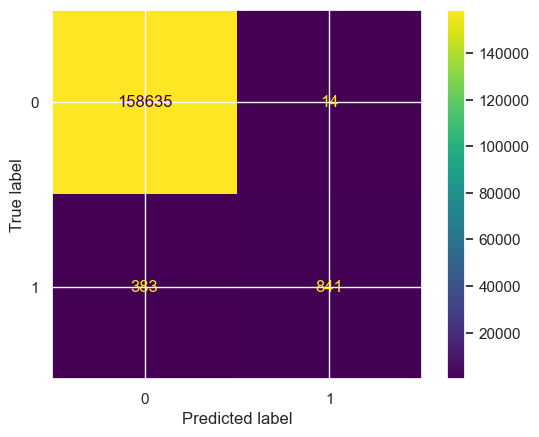

In [43]:
cmt = metrics.confusion_matrix(yt_test, logtransfer_predictions, labels=logisticTransfer.classes_)
tdisplay = metrics.ConfusionMatrixDisplay(confusion_matrix=cmt, display_labels=logisticTransfer.classes_)
tdisplay.plot();

In [44]:
# Test:  Predict user input of one transaction

print(logisticTransfer.predict([[1,11000.11,211000.11,200000,50000,61001.11,0,0,1.00]]))

[0]


## Cashout Only Model

In [45]:
cashout.head()

,step,type,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud,origBalanceDiscrepancy,destinationBalanceDiscrepancy
3,1,CASH_OUT,181.00,181.00,0.0,21182.0,0.00,1,0,0.00,21363.00
15,1,CASH_OUT,229133.94,15325.00,0.0,5083.0,51513.44,0,0,213808.94,182703.50
42,1,CASH_OUT,110414.71,26845.41,0.0,288800.0,2415.16,0,0,83569.30,396799.55
47,1,CASH_OUT,56953.90,1942.02,0.0,70253.0,64106.18,0,0,55011.88,63100.72
48,1,CASH_OUT,5346.89,0.00,0.0,652637.0,6453430.91,0,0,5346.89,-5795447.02


Feature Variables

In [46]:
XC = cashout.drop(['isFraud', 'type'], axis = 1)
yc = cashout['isFraud']

Split Cashout dataset

In [47]:
XC_train, XC_test, yc_train, yc_test = train_test_split(XC, yc, test_size = 0.3, random_state = 100)

XC_train.shape, XC_test.shape

((1566250, 9), (671250, 9))

Standardize the feature variables

In [48]:
scaler = StandardScaler()
XC_train = scaler.fit_transform(XC_train)
XC_test = scaler.transform(XC_test)

Fit the model to the training data

In [49]:
logisticCashout = LogisticRegression()
logisticCashout.fit(XC_train, yc_train)

LogisticRegression()

In [50]:
logcashout_predictions = logisticCashout.predict(XC_test)

logcashout_predictions[:5]

array([0, 0, 0, 0, 0])

In [51]:
print('Logistic Regression -- Cashout\n')

print('Accuracy: ', accuracy_score(yc_test, logcashout_predictions))
print('Recall: ', recall_score(yc_test, logcashout_predictions))

Logistic Regression -- Cashout

Accuracy:  0.9991657355679702
Recall:  0.5699013157894737


Cashout Model Coefficients

In [52]:
print(logisticCashout.coef_)

[[ 6.24290360e-01  1.27006186e-01  1.91564368e+00 -2.05163676e+01
  -5.34824936e-02 -4.59550242e-02  0.00000000e+00 -1.94285825e+01
  -1.28997954e-02]]


In [53]:
scoreC = metrics.accuracy_score(yc_test, logcashout_predictions)
scoreC

0.9991657355679702

Confusion Matrix (Cashout)

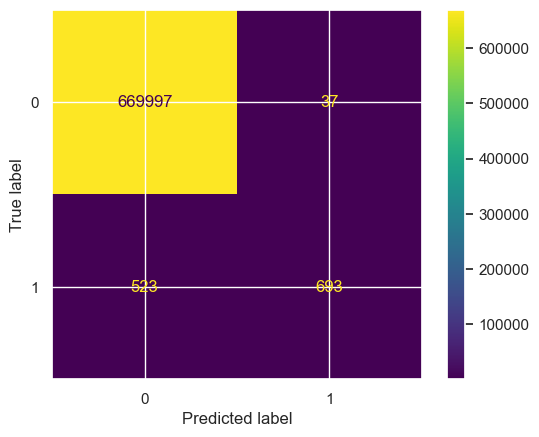

In [54]:
cmc = metrics.confusion_matrix(yc_test, logcashout_predictions, labels=logisticCashout.classes_)
cdisplay = metrics.ConfusionMatrixDisplay(confusion_matrix=cmc, display_labels=logisticCashout.classes_)
cdisplay.plot();

Function to run complete ML model on a csv dataset

In [55]:
def runLogisticML(testData):
    
    testData = testData.drop(labels = ['nameOrig', 'nameDest'], axis = 1)
    
    testData['origBalanceDiscrepancy'] = testData.newbalanceOrig + testData.amount - testData.oldbalanceOrg

    testData['destinationBalanceDiscrepancy'] = testData.oldbalanceDest + testData.amount - testData.newbalanceDest
    

    # Set variables for two transaction types 
    testTransfers = testData.loc[(testData.type == 'TRANSFER')]
    testCashout = testData.loc[(testData.type == 'CASH_OUT')]


    # Feature Variables for two models:
    XC = testCashout.drop(['isFraud', 'type'], axis = 1)
    yc = testCashout['isFraud']
    
    XT = testTransfers.drop(['isFraud', 'type'], axis =1)
    yt = testTransfers['isFraud']

    
    # Predict whether fraud or not
    predictFraudCashouts = logisticCashout.predict(XC.values)
    predictFraudCashouts[:5]
    
    predictFraudTransfers = logisticTransfer.predict(XT.values)
    predictFraudTransfers[:5]
    
    cTotal = 0
    cfCount = 0
    tTotal = 0
    tfCount = 0
    
    for i in predictFraudCashouts:
        cTotal += 1
        if i == 1:
            cfCount += 1 

    for i in predictFraudTransfers: 
        tTotal += 1
        if i == 1:
            tfCount += 1
    
    print("Predicted Fraudulent Cashout Transactions:", predictFraudCashouts)
    print("Predicted Fraudulent Transfer Transactions:", predictFraudTransfers)

    print("Out of", cTotal, "total Cashout transactions, ", cfCount, "found to be fraudulent.")
    print("Out of", tTotal, "total Transfer transactions, ", tfCount, "found to be fraudulent.")
    

# User Interface

## Identify filepath of csv file for review

In [56]:
# Sample upload of customer transaction data

file = ("fraudSampleData.csv")
testFile = pd.read_csv(file)
testFile

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,1,PAYMENT,7839.64,C1231006815,170136.00,160296.36,M1979787155,0.00,0.00,NaN,0
1,1,PAYMENT,2864.28,C1666544295,21249.00,19384.72,M2044282225,0.00,0.00,NaN,0
2,1,TRANSFER,181.00,C1305486145,181.00,0.00,C553264065,0.00,0.00,NaN,0
3,1,CASH_OUT,181.00,C840083671,181.00,0.00,C38997010,22182.00,0.00,NaN,0
4,1,PAYMENT,13668.14,C2048537720,41554.00,29885.86,M1230701703,0.00,0.00,NaN,0
5,1,PAYMENT,7817.71,C90045638,53860.00,46042.29,M573487274,0.00,0.00,NaN,0
6,1,PAYMENT,7107.77,C154988899,183195.00,176087.23,M408069119,0.00,0.00,NaN,0
7,1,PAYMENT,7861.64,C1912850431,176087.23,168225.59,M633326333,0.00,0.00,NaN,0
8,1,PAYMENT,4024.36,C1265012928,2671.00,0.00,M1176932104,0.00,0.00,NaN,0
9,1,DEBIT,5337.77,C712410124,41720.00,36382.23,C195600860,41898.00,40348.79,NaN,0


# User Interface

## Run Fraud Detection function

In [57]:
runLogisticML(testFile)

Predicted Fraudulent Cashout Transactions: [0 0 0 0 0]
Predicted Fraudulent Transfer Transactions: [1 0 0 0 0 0 0 0 0 0 0 0 0 1]
Out of 5 total Cashout transactions,  0 found to be fraudulent.
Out of 14 total Transfer transactions,  2 found to be fraudulent.
